<a href="https://colab.research.google.com/github/Meena-27/CodeAlpha_credit_scoring_model/blob/main/credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/credit_scoring.csv')

# Get the columns
columns = data.columns

# Print the columns
print(columns)


Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[14,6]

In [4]:
credit_dataset = pd.read_csv('/content/credit_scoring.csv')

In [5]:
credit_dataset.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [6]:
credit_dataset.shape

(1000, 12)

In [7]:
credit_dataset.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [9]:
scaler = StandardScaler()

In [11]:
# Drop any rows with missing values
data.dropna(inplace=True)


In [14]:
credit_dataset.nunique()


Age                           46
Gender                         2
Marital Status                 3
Education Level                4
Employment Status              3
Credit Utilization Ratio     101
Payment History              101
Number of Credit Accounts     10
Loan Amount                  897
Interest Rate                774
Loan Term                      5
Type of Loan                   3
dtype: int64

In [15]:
credit_dataset.select_dtypes(include='object').nunique().index


Index(['Gender', 'Marital Status', 'Education Level', 'Employment Status',
       'Type of Loan'],
      dtype='object')

In [17]:
credit_dataset=pd.get_dummies(credit_dataset,columns=['Gender', 'Marital Status', 'Education Level',
       'Employment Status','Type of Loan'],drop_first=True,dtype=int)
credit_dataset.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Home Loan,Type of Loan_Personal Loan
0,60,0.22,2685.0,2,4675000,2.65,48,1,1,0,0,1,0,0,0,0,1
1,25,0.20,2371.0,9,3619000,5.19,60,1,1,0,1,0,0,0,1,0,0
2,30,0.22,2771.0,6,957000,2.76,12,0,0,1,0,1,0,0,0,0,0
3,58,0.12,1371.0,2,4731000,6.57,60,0,1,0,0,0,1,0,1,0,0
4,32,0.99,828.0,2,3289000,6.28,36,1,1,0,0,0,0,1,0,0,1


r =Number of rows in the subplot grid
c=Number of columns in the subplot grid
it=iterator
for loop iterates over each column (i) in the credit_dataset.
The subplot() function takes three arguments: the number of rows (r), the number of columns (c), and the current iterator value (it). This determines the position of the subplot in the grid.
If the datatype of the current column is 'object' (i.e., categorical), it creates a countplot using seaborn's countplot() function.
If the datatype is not 'object', it assumes it's a numerical column and creates a kernel density estimate (KDE) plot using seaborn's kdeplot() function. Additionally, it adds grid lines to the plot.




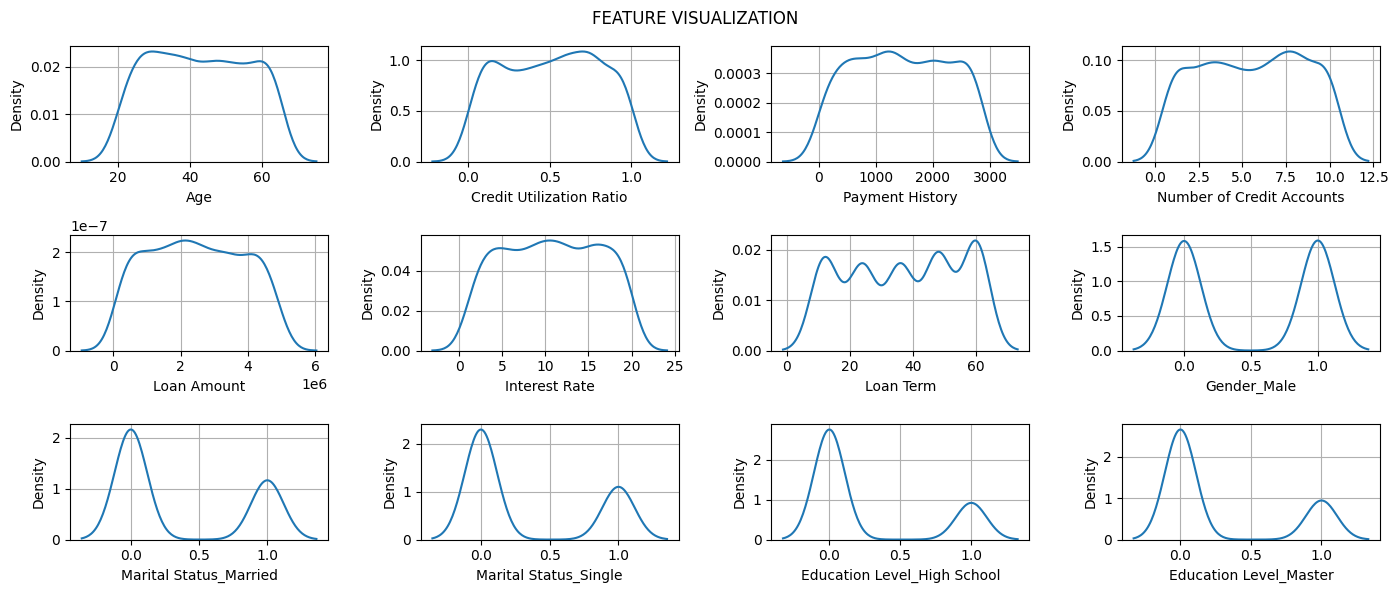

In [23]:
r = 3  # Keep the number of rows as 3
c = 4  # Keep the number of columns as 4
it = 0

plt.suptitle("FEATURE VISUALIZATION")

for i in credit_dataset.columns[:12]:  # Iterate over the first 12 columns only
    it += 1
    plt.subplot(r, c, it)
    if credit_dataset[i].dtypes == 'object':
        sns.countplot(x=credit_dataset[i])
    else:
        sns.kdeplot(credit_dataset[i])
        plt.grid()

plt.tight_layout()
plt.show()

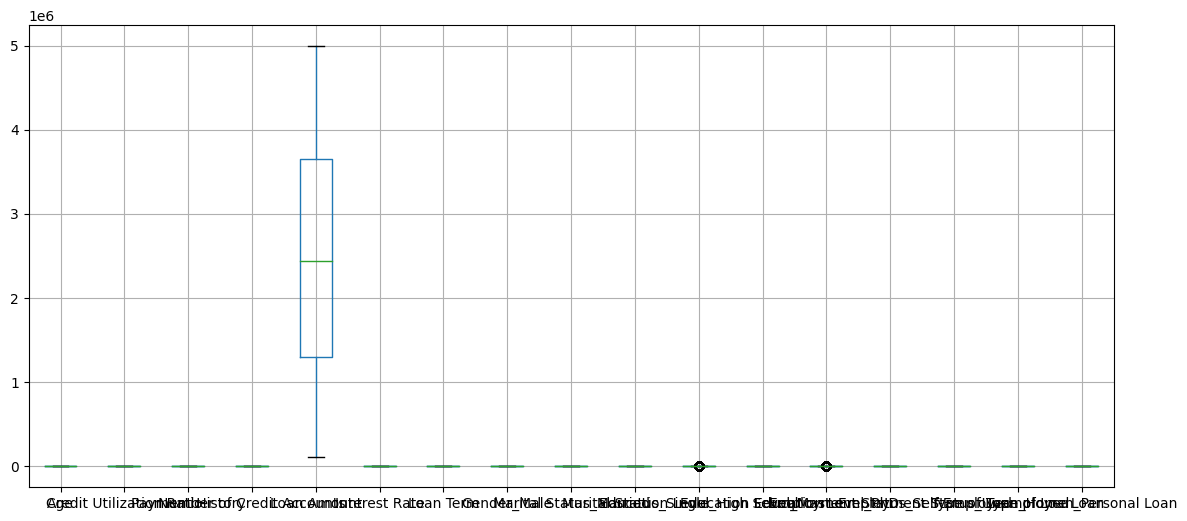

In [24]:
credit_dataset.boxplot()
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [26]:
mmax = MinMaxScaler()
ss = StandardScaler()

In [28]:
credit_dataset[['Age', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term']] = mmax.fit_transform(credit_dataset[['Age', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term']])
credit_dataset.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Home Loan,Type of Loan_Personal Loan
0,0.888889,0.22,0.939797,0.111111,0.934329,0.086407,0.75,1,1,0,0,1,0,0,0,0,1
1,0.111111,0.20,0.829891,0.888889,0.718290,0.220232,1.00,1,1,0,1,0,0,0,1,0,0
2,0.222222,0.22,0.969898,0.555556,0.173691,0.092202,0.00,0,0,1,0,1,0,0,0,0,0
3,0.844444,0.12,0.479874,0.111111,0.945786,0.292940,1.00,0,1,0,0,0,1,0,1,0,0
4,0.266667,0.99,0.289814,0.111111,0.650777,0.277661,0.50,1,1,0,0,0,0,1,0,0,1


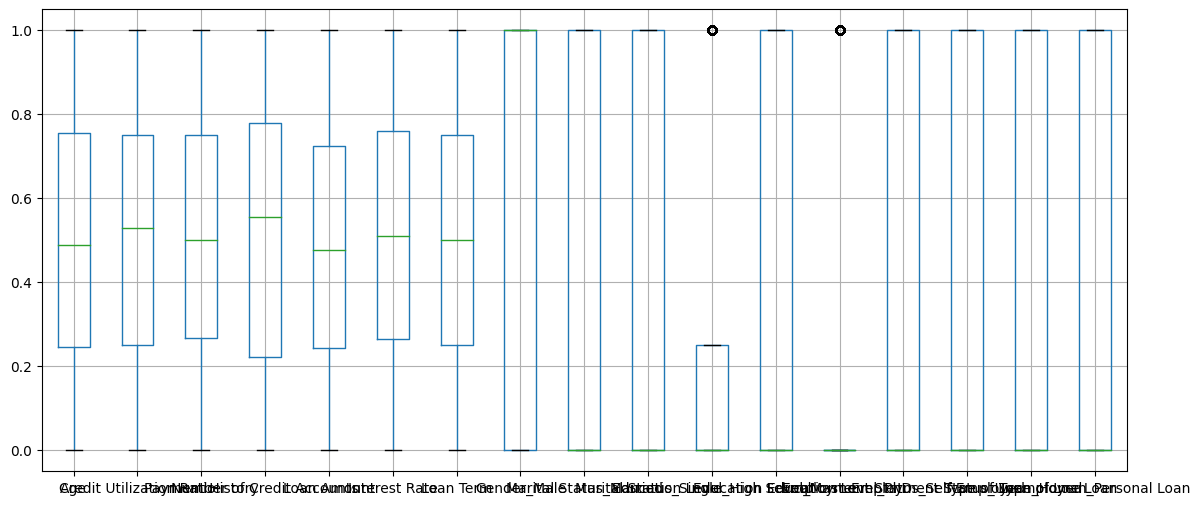

In [29]:
credit_dataset.boxplot()
plt.show()

In [30]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    model = kmeans.fit(credit_dataset)
    wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [33]:
wcss

[2519.0401982082603,
 2329.0571731692708,
 2208.370461045093,
 2117.6879819084447,
 2034.094540554401,
 1979.076033597505,
 1908.1147722211551,
 1879.823677936502]

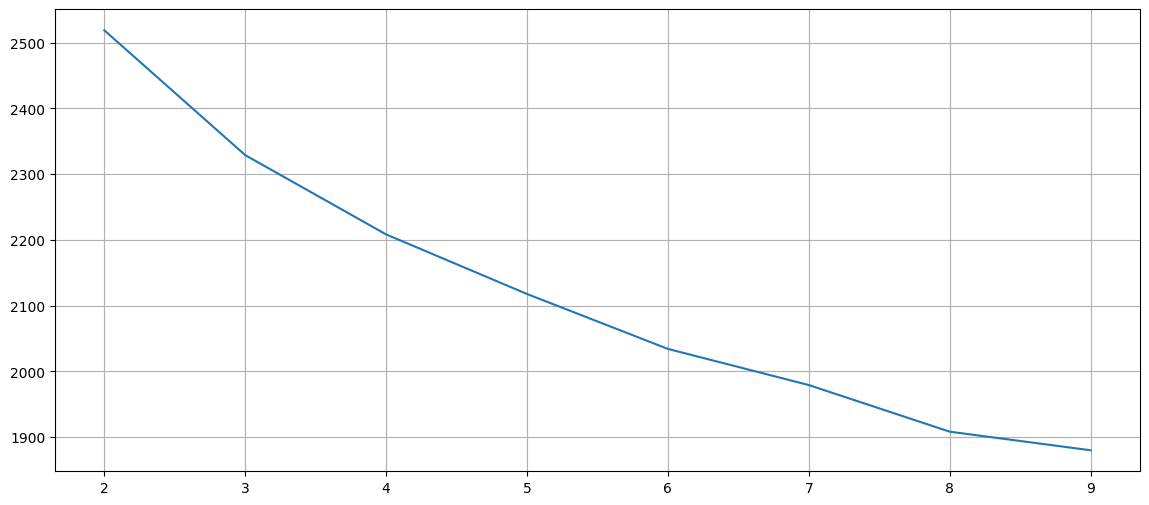

In [34]:
plt.plot(range(2,10),wcss)
plt.grid()
plt.show()

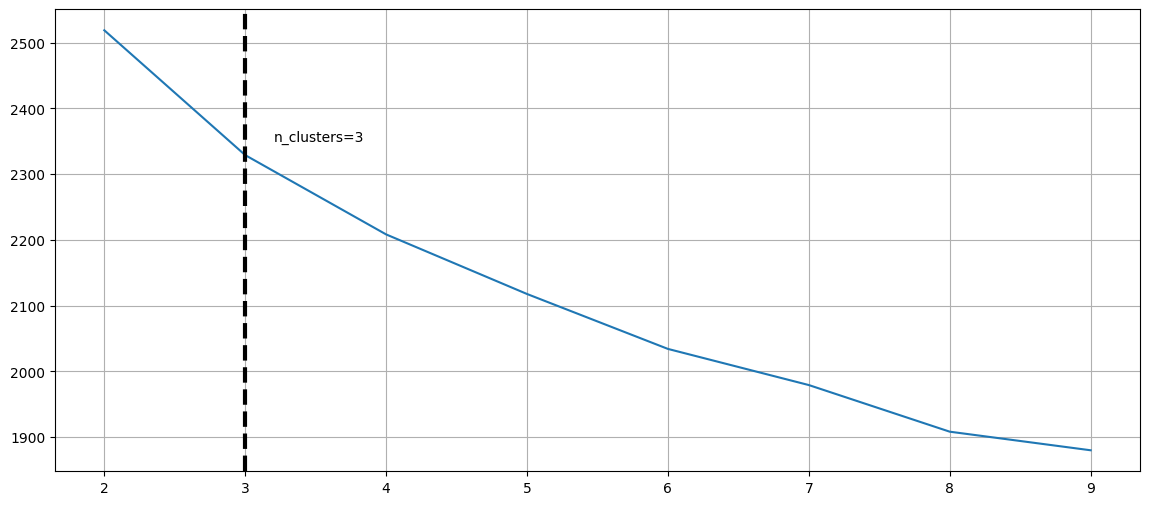

In [35]:
plt.plot(range(2,10),wcss)
plt.axvline(3,linestyle='--',linewidth=3,color='k')
plt.text(x=3.2,y=2350,s='n_clusters=3')
plt.grid()
plt.show()

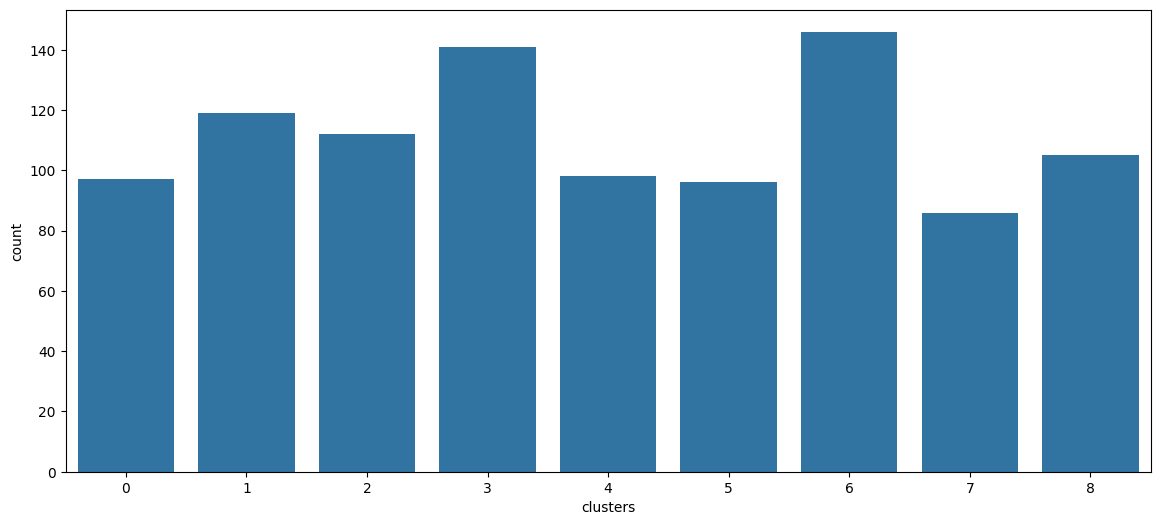

In [38]:
credit_dataset['clusters'] = pd.Series(kmeans.labels_)
credit_dataset.head()
sns.countplot(x=credit_dataset['clusters'])
plt.show()

In [41]:
credit_dataset.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Home Loan,Type of Loan_Personal Loan,clusters
0,0.888889,0.22,0.939797,0.111111,0.934329,0.086407,0.75,1,1,0,0,1,0,0,0,0,1,3
1,0.111111,0.20,0.829891,0.888889,0.718290,0.220232,1.00,1,1,0,1,0,0,0,1,0,0,6
2,0.222222,0.22,0.969898,0.555556,0.173691,0.092202,0.00,0,0,1,0,1,0,0,0,0,0,1
3,0.844444,0.12,0.479874,0.111111,0.945786,0.292940,1.00,0,1,0,0,0,1,0,1,0,0,7
4,0.266667,0.99,0.289814,0.111111,0.650777,0.277661,0.50,1,1,0,0,0,0,1,0,0,1,2


In [45]:
from sklearn.decomposition import PCA


In [47]:
pca = PCA(n_components=5)
x = pca.fit_transform(credit_dataset.drop('clusters',axis=1))

In [50]:
x = pd.DataFrame(data=x,columns=['x1','x2','x3','x4','x5'])
x.head()

,x1,x2,x3,x4,x5
0,-0.414392,-0.254817,0.974187,0.898605,-0.190155
1,0.067871,-0.779029,0.446265,-0.242213,-0.672377
2,0.520638,0.420231,-0.121514,0.331829,-0.022480
3,-0.133795,-0.939242,0.403826,-0.642115,0.652268
4,-0.977293,0.220029,0.556275,0.415056,-0.078397


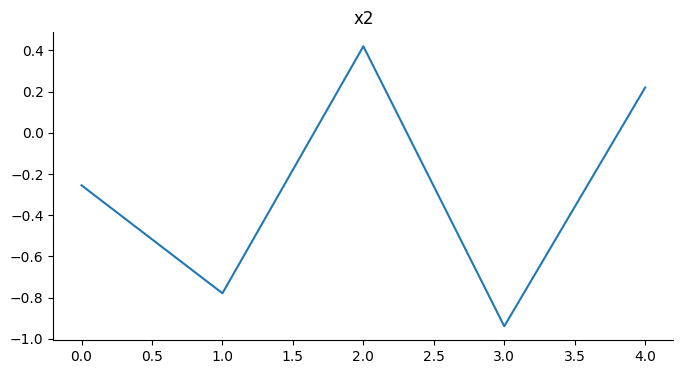

In [49]:
from matplotlib import pyplot as plt
_df_9['x2'].plot(kind='line', figsize=(8, 4), title='x2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [52]:
wcss

[2519.0401982082603,
 2329.0571731692708,
 2208.370461045093,
 2117.6879819084447,
 2034.094540554401,
 1979.076033597505,
 1908.1147722211551,
 1879.823677936502]

In [53]:
kmeans=KMeans(n_clusters=3,random_state=42)
model=kmeans.fit(x)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2,
       0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1,
       2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0,

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.model_selection import train_test_split


In [65]:
dt = DecisionTreeClassifier()

In [66]:
y=x['clusters']
x=x.drop('clusters',axis=1)

KeyError: 'clusters'

In [67]:
if 'clusters' not in x.columns:
    print("The 'clusters' column does not exist in the 'x' dataframe.")

The 'clusters' column does not exist in the 'x' dataframe.


In [68]:
print(x.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')


In [69]:
x['clusters'] = kmeans.labels_

In [70]:
x['clusters'] = pd.Series(model.labels_)
x.head()

,x1,x2,x3,x4,x5,clusters
0,-0.414392,-0.254817,0.974187,0.898605,-0.190155,1
1,0.067871,-0.779029,0.446265,-0.242213,-0.672377,1
2,0.520638,0.420231,-0.121514,0.331829,-0.022480,2
3,-0.133795,-0.939242,0.403826,-0.642115,0.652268,1
4,-0.977293,0.220029,0.556275,0.415056,-0.078397,1


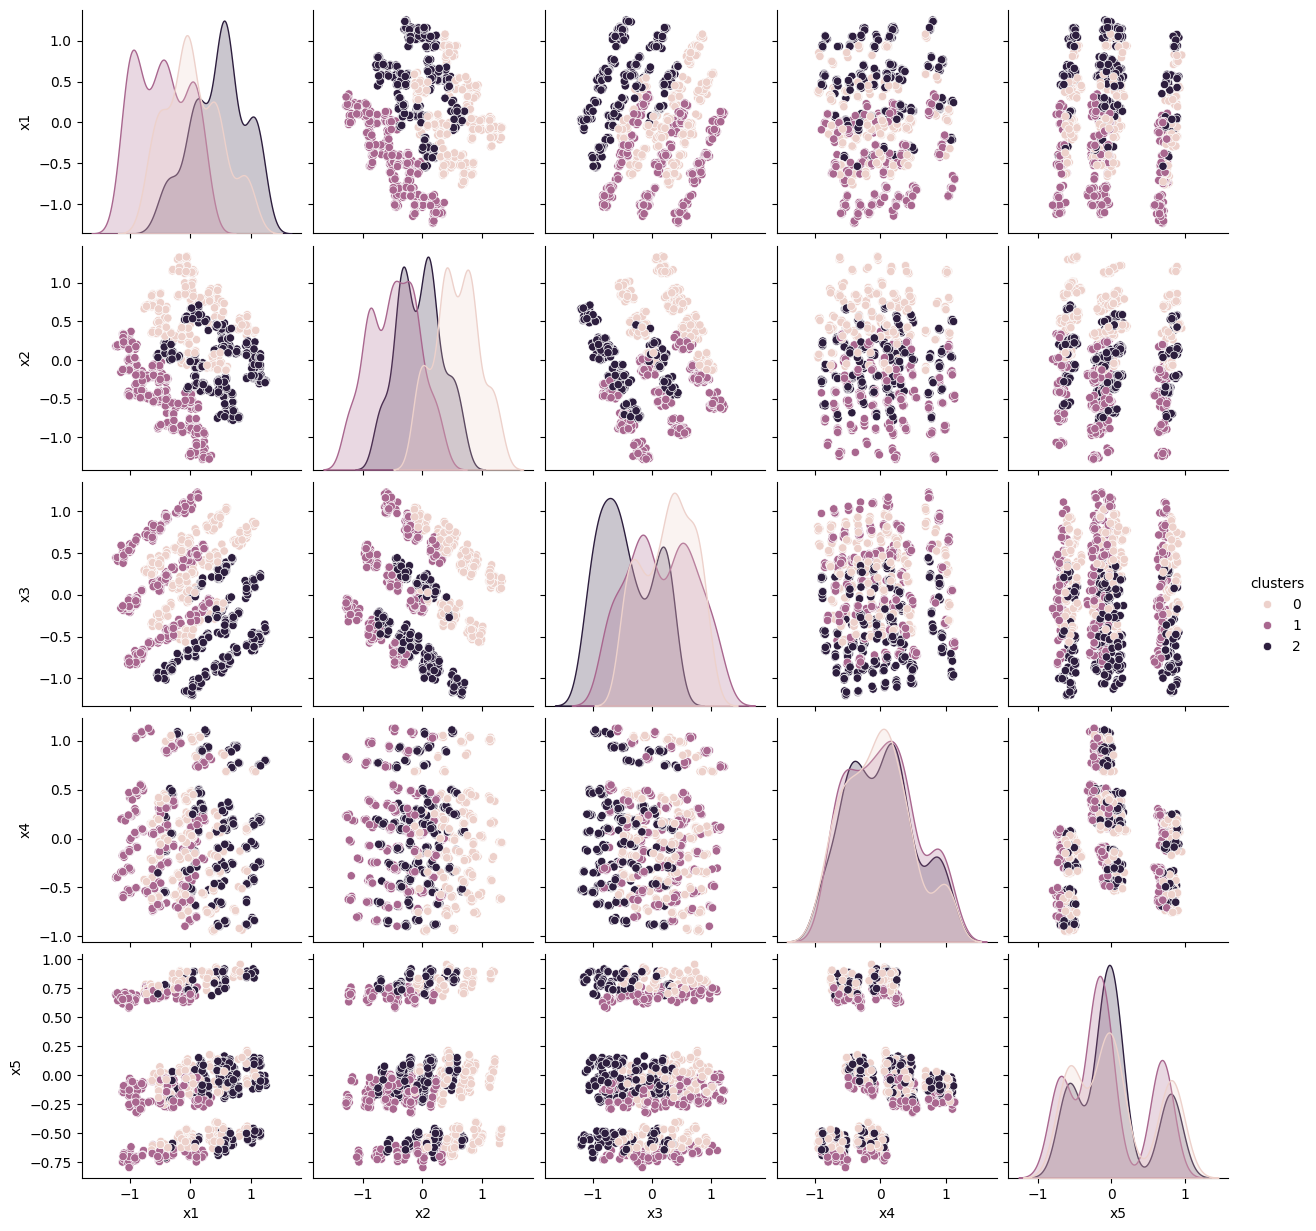

In [71]:
sns.pairplot(x,hue='clusters')
plt.grid()
plt.show()

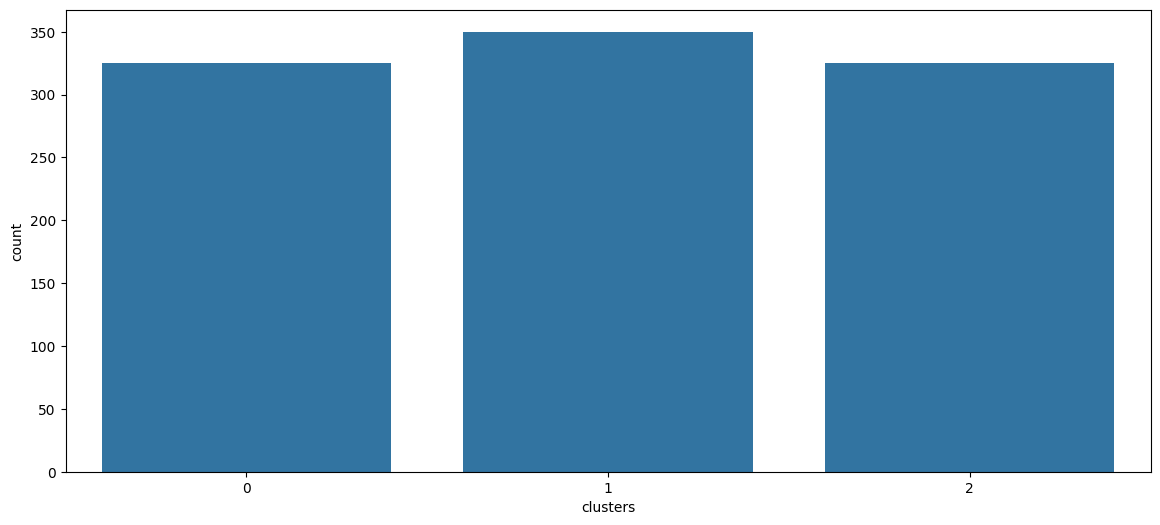

In [72]:
sns.countplot(x='clusters',data=x)
plt.show()

In [73]:
y=x['clusters']
x=x.drop('clusters',axis=1)

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)


In [75]:
from sklearn.metrics import accuracy_score


In [76]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [77]:
y_pred_train = dt_model.predict(xtrain)
y_pred_test = dt_model.predict(xtest)

In [78]:
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(1.0, 0.9833333333333333)

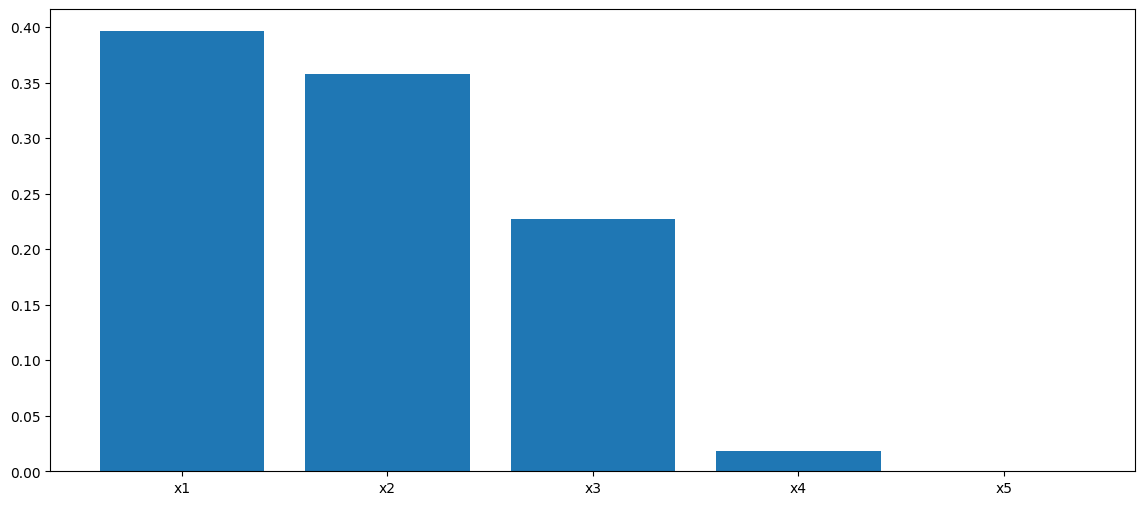

In [79]:
plt.bar(xtrain.columns,dt_model.feature_importances_)
plt.show()